<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Dimensionality_and_Structured_Models_in_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality and Structured Models in Healthcare**

In this section, I am going to explore situations where nearest neighbor averaging does not work well, especially in healthcare data. I'll look into ways to handle these challenges. Nearest neighbor averaging, which I just discussed, works well when I have a small number of variables (p ≤ 4) and a large number of data points (n), so I have enough points in each neighborhood to average for estimation. However, this is just one version of a broader category of techniques called smoothers, such as kernel and spline smoothing.


The problem arises when the number of variables (p) is large. This issue is known as the 'curse of dimensionality.' In high dimensions, nearest neighbors tend to be far apart, making it challenging to get a reasonable fraction of the values to average, which is necessary to reduce variance.
For example, if I want 10% of the data points in each neighborhood, the problem becomes that a 10% neighborhood in high dimensions is no longer local, losing the spirit of local averaging.

Example: The Curse of Dimensionality

In the left panel of a visual example, I have values of two healthcare variables, such as blood pressure (x1) and cholesterol (x2), distributed uniformly in a space with edges from -1 to +1. I form two 10% neighborhoods. The first involves only x1 and ignores x2. The width of the neighborhood is defined by the vertical dotted lines, capturing 10% of the data points.

When extending to two dimensions, I spread out a circle around the target point until it captures 10% of the points. In two dimensions, the radius of this circle is larger than in one dimension, showing that to capture a certain percentage of points in higher dimensions, I must extend further, making it less local.

On the right-hand plot, I observe the increasing distance required to capture a certain fraction of the volume as dimensions increase. In 5 dimensions, I have to cover almost the entire space to get 10% of the data, and in 10 dimensions, I need to cover even more, illustrating how challenging it is to stay local in high dimensions.

Parametric and Structured Models

To handle this, I introduce structure to the models. The simplest structured model is a linear model, which approximates the function of X by a linear function, with coefficients for each variable and an intercept. While a linear model is almost never correct, it often serves as a good approximation and is interpretable.

I can estimate the parameters of this model by fitting it to training data. A structured model like this avoids the curse of dimensionality because it doesn't rely on local properties. Instead, it fits a single model to all the data, providing a more global approach.

Example: Healthcare Data and Linear Regression

In my healthcare dataset, I use a linear model to predict patient recovery time based on seniority (years of experience) and years of education. The model captures the main elements of the relationship but does not capture everything, reflecting the balance between simplicity and accuracy.
I also explore more flexible regression models, like thin-plate splines, which offer a smooth version of multi-dimensional smoothing. These models provide a better fit by capturing more nuances in the data, but they can also lead to overfitting if not properly tuned.

Trade-offs in Model Building

There are trade-offs when building models. For example, linear models are easy to interpret with just a few parameters, while more complex models like thin-plate splines provide higher flexibility but less interpretability.

I must also consider the balance between underfitting, where the model is too simple, and overfitting, where the model is too complex. To achieve the right fit, I need to choose the appropriate model based on the data and the context.

Conclusion

In this section, I covered linear regression and nearest neighbor averaging, discussing situations where these methods might not work well, such as in high dimensions. I introduced other methods to address these issues, and I will explore further how to select the best model for different situations in the next segment.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [15]:
# Generate synthetic healthcare data (e.g., blood pressure and cholesterol)
import numpy as np
np.random.seed(42)
n_points = 500
x1 = np.random.uniform(-1, 1, n_points)  # Example variable: blood pressure
x2 = np.random.uniform(-1, 1, n_points)  # Example variable: cholesterol
y = 3 * x1 + 2 * x2 + np.random.normal(0, 0.2, n_points)  # Linear relationship with noise

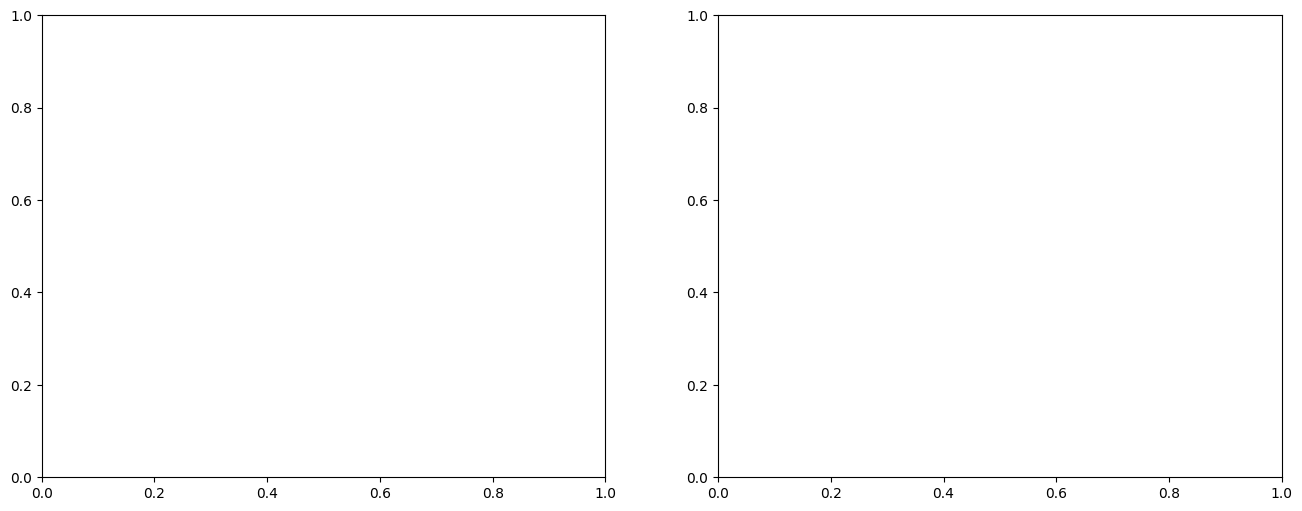

In [7]:
# Example: The Curse of Dimensionality
# To illustrate the curse of dimensionality, we examine 1D and 2D neighborhoods.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

In [8]:
# In one dimension, the neighborhood is defined along x1, ignoring x2.
axes[0].hist(x1, bins=30, color="#3B528BFF", alpha=0.8, edgecolor="#440154FF")
axes[0].set_title("1D Distribution of x1 with 10% Neighborhood", fontsize=14, color="#FDE725FF")
axes[0].set_xlabel("x1 (e.g., blood pressure)", color="#FDE725FF")
axes[0].set_ylabel("Count", color="#FDE725FF")

Text(4.444444444444452, 0.5, 'Count')

In [9]:
# In two dimensions, we extend a circle to capture 10% of the data points.
sc = axes[1].scatter(x1, x2, c=y, cmap="inferno", alpha=0.6, edgecolor='w')
axes[1].set_title("2D Distribution of x1 and x2 with Neighborhood", fontsize=14, color="#FDE725FF")
axes[1].set_xlabel("x1 (e.g., blood pressure)", color="#FDE725FF")
axes[1].set_ylabel("x2 (e.g., cholesterol)", color="#FDE725FF")
plt.colorbar(sc, ax=axes[1], label="Target Value (e.g., recovery time)")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
# Parametric and Structured Models
# Linear models approximate the function of X by a linear function, which provides a
# global approach to modeling without relying on local properties.
X = np.vstack((x1, x2)).T
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

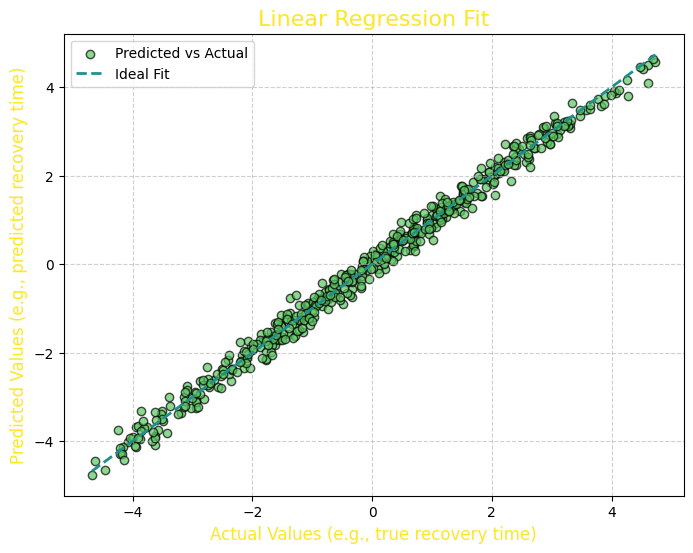

In [11]:
# Example: Healthcare Data and Linear Regression
# Predict patient recovery time based on seniority (x1) and years of education (x2).
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c="#5DC863FF", edgecolor="k", alpha=0.7, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, label="Ideal Fit", color="#21908CFF")
plt.title("Linear Regression Fit", fontsize=16, color="#FDE725FF")
plt.xlabel("Actual Values (e.g., true recovery time)", fontsize=12, color="#FDE725FF")
plt.ylabel("Predicted Values (e.g., predicted recovery time)", fontsize=12, color="#FDE725FF")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [12]:
# Flexible regression models like thin-plate splines capture more nuances in the data,
# but they can lead to overfitting if not properly tuned. In contrast, linear models
# strike a balance between simplicity and accuracy.

# High-dimensional Nearest Neighbors
# In high dimensions, nearest neighbors tend to be far apart, making it challenging
# to capture 10% of the data points locally.
X_high_dim = np.random.uniform(-1, 1, (n_points, 10))  # 10-dimensional data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_high_dim, y)
y_high_dim_pred = knn.predict(X_high_dim)

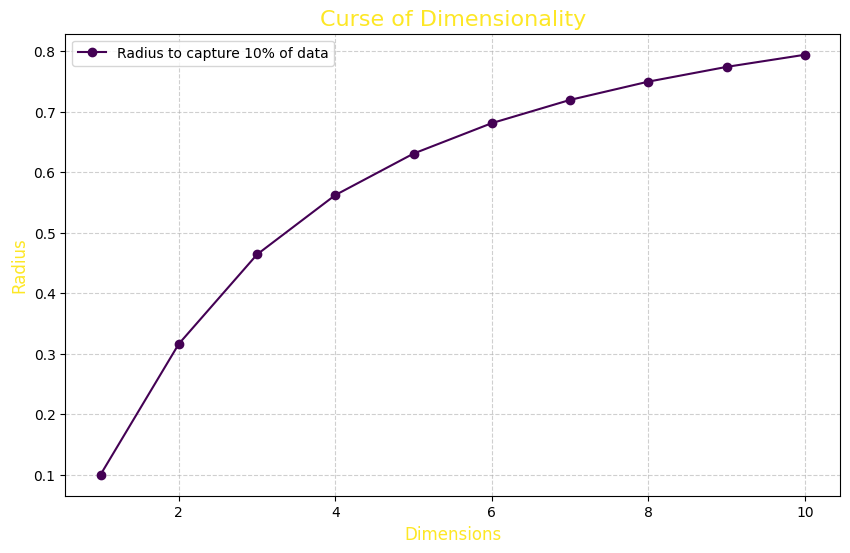

In [13]:
# Visualization of Coverage in High Dimensions
# As the number of dimensions increases, the radius required to capture 10% of the data grows significantly.
dimensions = np.arange(1, 11)
radii = np.power(0.1, 1 / dimensions)  # Fractional volume for 10% in each dimension

plt.figure(figsize=(10, 6))
plt.plot(dimensions, radii, marker="o", color="#440154FF", label="Radius to capture 10% of data")
plt.title("Curse of Dimensionality", fontsize=16, color="#FDE725FF")
plt.xlabel("Dimensions", fontsize=12, color="#FDE725FF")
plt.ylabel("Radius", fontsize=12, color="#FDE725FF")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [14]:
# Trade-offs in Model Building
# Linear models are interpretable but less flexible, while more complex models like
# thin-plate splines provide higher flexibility but risk overfitting. The choice of
# model depends on the specific healthcare data and the context of the problem.